In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

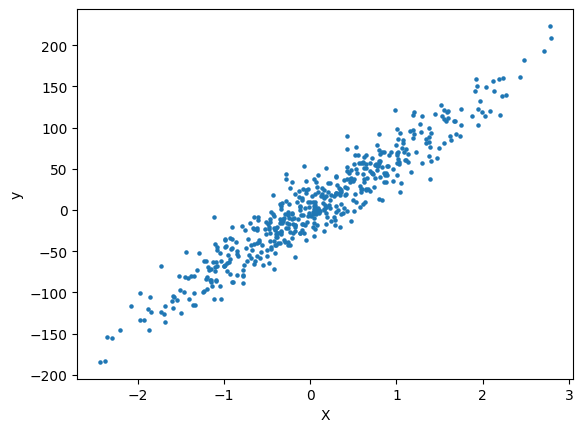

In [2]:
X, y = datasets.make_regression(
    n_samples=500, n_features=1, noise=20, random_state=4
)

sizes = 5

fig, ax = plt.subplots()
ax.scatter(X, y, s=sizes)

ax.set_xlabel("X")
ax.set_ylabel("y")

plt.show()

In [3]:
class LinearRegression:
    def __init__(self, lr: int = 0.01, n_iters: int = 500) -> None:
        self.lr = lr
        self.n_iters = n_iters
        self.theta_1 = None
        self.theta_0 = None
        
    def fit(self, X, y):
            num_samples, num_features = X.shape     # X shape [N, f]
            self.theta_1 = np.random.rand(num_features)  # W shape [f, 1]
            self.theta_0 = 0

            for i in range(self.n_iters):

                # y_pred shape should be N, 1
                y_pred = np.dot(X, self.theta_1) + self.theta_0

                # X -> [N,f]
                # y_pred -> [N]
                # dw -> [f]
                dw = (1 / num_samples) * np.dot(X.T, y_pred - y)
                db = (1 / num_samples) * np.sum(y_pred - y)

                self.theta_1 = self.theta_1 - self.lr * dw
                self.theta_0 = self.theta_0 - self.lr * db

                # FOR ANIMATION ONLY: save snapshots at each iteration of regression line vs training data

                # sizes = 5

                # fig, ax = plt.subplots()
                # ax.scatter(X, y, s=sizes)

                # regression = self.theta_1 * X + self.theta_0

                # ax.plot(X, regression, color="red")

                # ax.set_xlabel("X")
                # ax.set_ylabel("y")

                # plt.savefig(f"{i}.png")

    def predict(self, X):
            return np.dot(X, self.theta_1) + self.theta_0

In [4]:
model = LinearRegression()

In [5]:
model.fit(X,y)

In [6]:
#Show parameters

print(f"input weight: {model.theta_1}")
print(f"bias: {model.theta_0}")

input weight: [64.91578148]
bias: 0.8701711660525716


In [7]:
model.predict(0)

array([0.87017117])

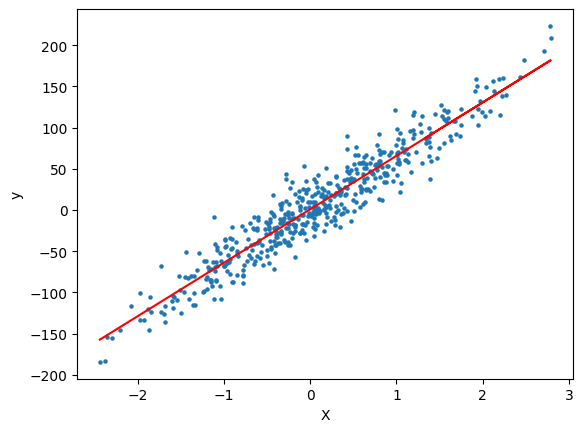

In [8]:
# Now, replot the data with the regression line

sizes = 5

fig, ax = plt.subplots()
ax.scatter(X, y, s=sizes)

regression = model.theta_1 * X + model.theta_0

ax.plot(X, regression, color="red")

ax.set_xlabel("X")
ax.set_ylabel("y")

plt.show()

In [18]:
#SLIDESHOW

import cv2
import os

def create_slideshow(directory):
    # Get list of image files in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith('.png')]

    # Sort the images based on their filenames
    image_files.sort(key=lambda x: int(x.split('.')[0]))

    # Create a window
    cv2.namedWindow('Slideshow', cv2.WINDOW_NORMAL)

    # Loop through the images and display each for 0.05 seconds
    for image_file in image_files:
        image_path = os.path.join(directory, image_file)
        image = cv2.imread(image_path)
        cv2.imshow('Slideshow', image)
        cv2.waitKey(50)  # Display each image for 0.05 seconds
    cv2.destroyAllWindows()

# Replace 'images_directory' with the path to your directory containing the images
create_slideshow("images_directory")

: 

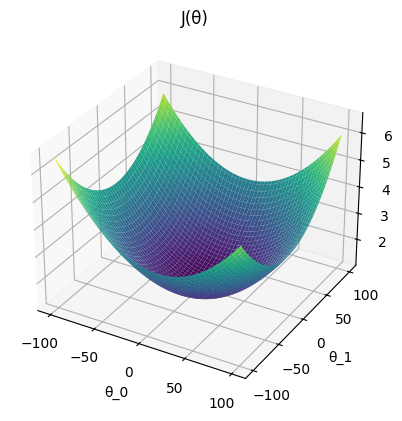

In [13]:
# GRADIENT DESCENT LANDSCAPE PLOT

def compute_cost(X,y,theta_1,theta_0):
    m = len(y)
    predictions = theta_1*X + theta_0
    cost = (1/(2*m))*np.sum(np.square(predictions - y))
    return cost

# Generate a grid of theta_0 and theta_1 values
theta_0_vals = np.linspace(-100, 100, 100)
theta_1_vals = np.linspace(-100, 100, 100)
J_vals = np.zeros((len(theta_0_vals), len(theta_1_vals)))

# Evaluate the cost function over the grid of theta_0 and theta_1 values
for i, t0 in enumerate(theta_0_vals):
    for j, t1 in enumerate(theta_1_vals):
        J_vals[i, j] = compute_cost(X, y, t0, t1)

# Create a contour plot
theta_0_vals, theta_1_vals = np.meshgrid(theta_0_vals, theta_1_vals)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_vals, theta_1_vals, J_vals, cmap='viridis')

ax.set_xlabel('θ_0')
ax.set_ylabel('θ_1')
ax.set_zlabel('J(θ)')
plt.title('J(θ)')
plt.show()